<a href="https://colab.research.google.com/github/apurvakumbhar/ANN/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predictions for new inputs: [0 1]


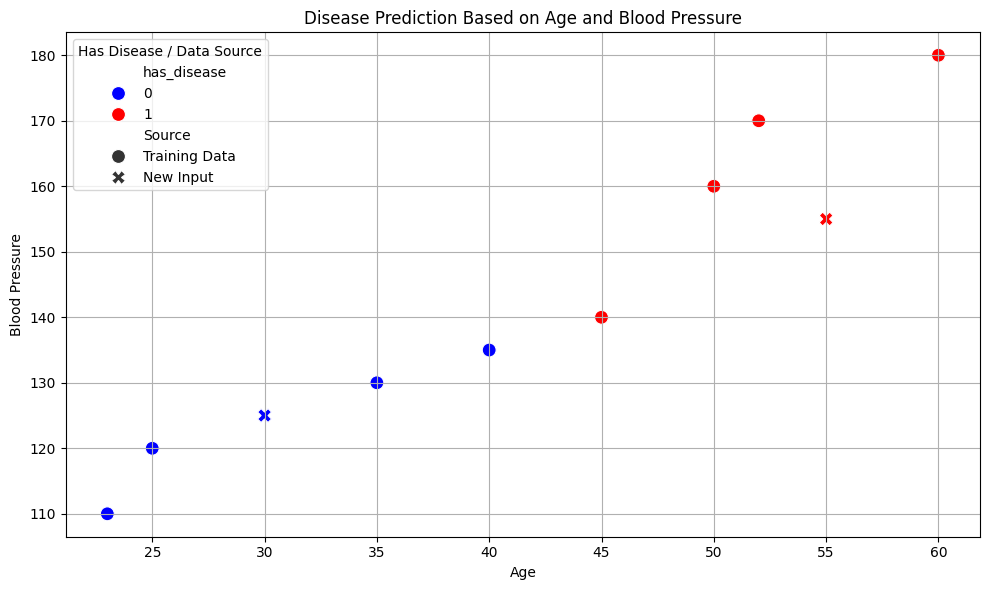

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'age': [25, 45, 35, 50, 23, 52, 40, 60],
    'blood_pressure': [120, 140, 130, 160, 110, 170, 135, 180],
    'cholesterol': [200, 250, 210, 260, 190, 270, 220, 280],
    'has_disease': [0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

X = df[['age', 'blood_pressure', 'cholesterol']]
y = df['has_disease']

# Creating logistic regression model with L2 regularization
model = LogisticRegression(penalty='l2', C=1.0)

# Training the model on the full dataset
model.fit(X, y)

# New input data for prediction
new_input = pd.DataFrame({
    'age': [30, 55],
    'blood_pressure': [125, 155],
    'cholesterol': [210, 250]
})

# Predicting disease for new inputs
predictions = model.predict(new_input)
print("Predictions for new inputs:", predictions)

# Add predictions to new_input for visualization
new_input['Prediction'] = predictions

# Combine original and new data for plotting
df['Source'] = 'Training Data'
new_input['has_disease'] = predictions
new_input['Source'] = 'New Input'
combined_df = pd.concat([df, new_input], ignore_index=True)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=combined_df,
    x='age',
    y='blood_pressure',
    hue='has_disease',
    style='Source',
    palette={0: 'blue', 1: 'red'},
    s=100
)
plt.title('Disease Prediction Based on Age and Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend(title='Has Disease / Data Source')
plt.grid(True)
plt.tight_layout()
plt.show()